## Loss function

The **loss function** measures a models prediction error, more specifically it calculates the difference between the model prediction and the true label. The loss function is also called error function or cost function. 

The loss functions is useful because:
 * It provides a measure for model performance
 * It helps to monitor the training progress, if the loss does not change any more the model has stopped learning
 * It helps to compare different versions of a model
 * The gradient of the loss function informs the optimizer how to update model parameters to reduce the prediction error.
 
When we talk about "training the model" or optimization we actually mean minimizing the loss function.

Let $J(y, \hat y)$ be the loss function for a single example $x$, with the true label $y$ and the prediction $\hat y$.

The value of $J(y, \hat y)$ is a positive scalar, a value of 0 would indicate a model that hat no predicton error.

The loss of a set of examples $x = [x_1,...,x_n]$ is the average of the individual losses:

$$
J = \frac{1}{N}\sum_{i=1}^N J(y_i, \hat y_i)
$$

Note that the loss does not have a unit, it is just a number.

There are many different loss functions available, the choice depends on the type of prediction problem. 

The **cross entropy function** is a common choice for classification problems.

Popular loss functions for regression problems are **mean squared error** or **mean average error**.

## Cross entropy loss

Let $x$ be an example, $y$ is the one-hot encoded true label for $x$ and $\hat y$ are the predicted class probabilities for $x$ (usually from a softmax layer).

If there are 5 classes and $y=2$ than the one-hot encoded value would be $[0, 1, 0, 0, 0]$.

The **cross entropy** loss for a single example $x$ is defined as:

$$
L(y, \hat y) = - y \cdot log(\hat y)
$$

Note that $\cdot$ is the dot product.

Because $y$ is one-hot encoded the cross entropy loss depends only on the probability of the correct class. The loss is independent of how the remaining probability is split between incorrect classes.

In [3]:
import numpy as np
y = np.array([0, 1, 0, 0, 0])
y_hat = np.array([0.1, 0.7, 0.02, 0.04, 0.04])
loss = -np.dot(y, np.log(y_hat))
print(loss)

0.35667494393873245


The value $\hat y$ must be a probability distribution (the values must sum to 1). 

In most cases the cross entropy loss will be used together with a softmax layer.

Lets looks how the cross entropy loss looks like:

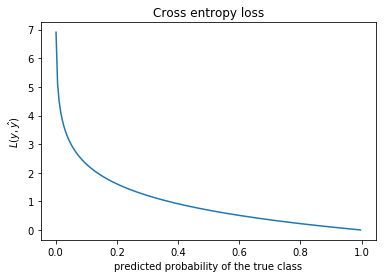

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.001, 1.0, 0.005)
y = -np.log(x)
plt.plot(x,y)
plt.title('Cross entropy loss')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('predicted probability of the true class')
plt.show()

When the predicted probability is high, the loss is very low and goes to 0. When the predicted probability is low, the loss is high and goes to infinity.

The loss for a set of examples is calculated as average of the individual losses. This is often called a cost function.

$$
J = - \frac{1}{N} \sum_i^N y_i \cdot log(\hat y_i)
$$

The cost function is what is actually minimizes when we train a model.

For a **binary classification** problem $y \in [0,1]$ and $\hat y = p(y=1 \mid x)$. 

In this case the cross entropy is calculated like this:

$$
L(y, \hat y) = -y \ log(\hat y) + (1-y) \ log(1-\hat y)
$$

Notice that the terms $-y$ and $(1-y)$ are **indicator functions** and one always evaluates to 1 and the other evaluates to 0.

## Mean Square Error (MSE)

Mean Square Error (MSE) is the most commonly used regression loss function. 

MSE is the sum of squared distances between the target values and predicted values.

$$
MSE = \frac{1}{N} \sum_i^N(y_i - \hat y_i)^2
$$

MSE is also called L2 loss.


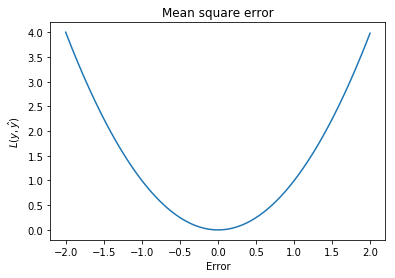

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2.0, 2.0, 0.005)
y = x**2
plt.plot(x,y)
plt.title('Mean square error')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('Error')
plt.show()

## Mean absolute error (MAE)

Mean Absolute Error (MAE) is another loss function used for regression models. 

MAE is the sum of absolute differences between the target values and predicted values.

$$
MAE = \frac{1}{N} \sum_i^N \mid y_i - \hat y_i \mid
$$

MAE is also called L1 loss.


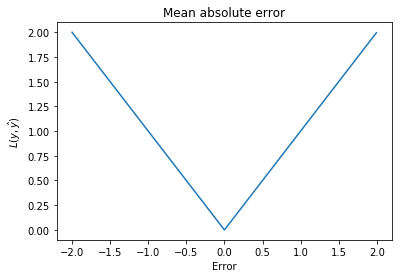

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2.0, 2.0, 0.005)
y = abs(x)
plt.plot(x,y)
plt.title('Mean absolute error')
plt.ylabel('$L(y,\hat y)$')
plt.xlabel('Error')
plt.show()